## <u>Model Benchmarks</u>

#### External Libraries

In [ ]:
# ! pip install xgboost

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from collections import Counter

from sklearn.externals.six import StringIO
from sklearn.linear_model import  LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from pactools.grid_search import GridSearchCVProgressBar
from xgboost import XGBClassifier
from sklearn.svm import SVR, SVC
from ClassificationMetrics import ClassificationMetrics
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import pydotplus

%matplotlib inline

In [52]:
betting_df = pd.read_csv('../Data/betting_df_processed.csv')

#### Read in Data

### <U>Logistic Regression Time Series</U>

In [18]:
# What index gives us our 80th percentile of rows?
# betting_df.shape[0] * .8

843.2

In [195]:
features = ['stadium_type_dome', 'weather_wind_mph', 'weather_temperature', 'season_year', 
            'home_win_rate', 'away_win_rate', 'away_line_odds_open', 'home_line_odds_open', 'over/under', 'home_favorite',
            'spread', 'stadium_type_rain_|_fog', 'cum_avg_points']

X = betting_df[features]
y = betting_df['target']


In [196]:
#Set training data to be first 80% of rows.
X_train = X.iloc[0:843]
y_train = y.iloc[:843]

In [197]:
#Set testing data to be last 20% of rows.
X_test = X.iloc[843:]
y_test = y.iloc[843:]

In [198]:
#Scaling Data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [199]:
poly = PolynomialFeatures(include_bias = False)
poly = poly.fit(X_train_sc)
poly_features = poly.get_feature_names(features)

X_train_poly = pd.DataFrame(poly.transform(X_train_sc), columns=poly_features)
X_test_poly = pd.DataFrame(poly.transform(X_test_sc), columns=poly_features)


In [69]:
lr = LogisticRegression()
lr.fit(X_train_poly, y_train)
cv = cross_val_score(lr,X_train_poly, y_train).mean()
train = lr.score(X_train_poly, y_train)
test = lr.score(X_test_poly, y_test)
print(f'Accuracy = \t{cv}' )

Accuracy = 	0.4899759146484368


### <U>Logistic Regression</U>


In [201]:
features = ['stadium_type_dome', 'weather_wind_mph', 'weather_temperature', 'season_year', 
            'home_win_rate', 'away_win_rate', 'away_line_odds_open', 'home_line_odds_open', 'over/under', 'home_favorite',
            'spread', 'stadium_type_rain_|_fog', 'cum_avg_points']

X = betting_df[features]
y = betting_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)



In [202]:
y.value_counts(normalize=True)

0    0.518027
1    0.481973
Name: target, dtype: float64

- Baseline is 51.8%. Meaning if you only bet the under everytime you would win 51.8% of the time

In [203]:
#Scaling Data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [204]:
poly = PolynomialFeatures(include_bias = False)
poly = poly.fit(X_train_sc)
poly_features = poly.get_feature_names(features)

X_train_poly = pd.DataFrame(poly.transform(X_train_sc), columns=poly_features)
X_test_poly = pd.DataFrame(poly.transform(X_test_sc), columns=poly_features)

In [205]:
lr = LogisticRegression()
lr.fit(X_train_poly, y_train)
cv = cross_val_score(lr,X_train_poly, y_train).mean()
train = lr.score(X_train_poly, y_train)
test = lr.score(X_test_poly, y_test)
print(f'Accuracy = \t{cv}' )

Accuracy = 	0.49385000963948333


### <u>Random Forest Classifier</U>

In [188]:
# Instantiate Random Forest Classifier as rf.
rf = RandomForestClassifier(n_estimators = 15,
                            random_state = 12)

# Fit on training data.
model = rf.fit(X_train_poly, y_train)

# Cross-Val Score on training data
cv_score = cross_val_score(rf,X_train_poly,y_train, cv=3).mean()

# Score on training data.
rf_train = model.score(X_train_poly,y_train)

# Score on testing data.
rf_test = model.score(X_test_poly,y_test)

print(f'Accuracy : {cv_score}')

Accuracy : 0.5292351758517172


### <u>PCA</u>
- With Polynomial transforms

In [189]:
pca = PCA()
pca = pca.fit(X_train_poly)

In [190]:
Z_train = pd.DataFrame(pca.transform(X_train_poly))

In [191]:
Z_test = pd.DataFrame(pca.transform(X_test_poly))

In [86]:
Z_train.head()

0         1         2         3         4         5         6    \
0 -1.015854 -0.926692  3.342189  0.831376 -2.316272 -3.619211  0.201280   
1 -1.006444 -0.991169  1.219374 -1.847989  6.095592  2.711930  4.058821   
2 -1.016125 -0.999618  1.014343 -0.914752  0.062639 -1.558086 -1.224591   
3 -1.005762 -0.991631 -2.110569  0.067987  0.440472 -0.959981 -0.205839   
4 -1.005243 -1.033268 -2.013190  0.474936 -0.297854 -1.252584 -1.025643   

        7         8         9        ...                94            95   \
0  0.972474  1.654971 -0.072771      ...       2.830308e-16 -6.224506e-16   
1  0.542380 -1.207193  0.533545      ...      -1.054547e-15 -5.030602e-16   
2  1.413758 -1.118003  1.731448      ...      -3.952994e-17 -1.260840e-15   
3  1.429215  0.570131  1.311407      ...       6.054518e-17 -3.895130e-16   
4  0.668912  0.740939 -0.054341      ...      -1.602611e-16  3.709982e-16   

            96            97            98            99            100  \
0 -6.434367e-17  8.265479e-16  4.181353e-17  5.302070e-16 -3.178232e-16   
1  5.705349e-16  4.353330e-16 -4.263308e-16  7.762516e-18 -8.209616e-16   
2  3.645656e-16  4.746456e-16  5.204726e-16 -3.975662e-16  2.244278e-16   
3  5.137718e-17 -3.579042e-16  9.835051e-17  7.684397e-17  8.302659e-17   
4  1.504445e-16  9.352131e-17  4.503019e-16 -4.554412e-16 -1.073710e-16   

            101           102           103  
0 -1.568728e-16 -4.895960e-16 -1.713160e-14  
1 -3.605589e-16  1.406670e-16 -2.696074e-16  
2  4.687312e-16 -9.275480e-16 -4.986914e-15  
3  9.292899e-17  2.217730e-16 -1.148537e-15  
4  1.259154e-16 -2.135547e-17 -1.681234e-15  

[5 rows x 104 columns]

In [88]:
# Examine explained variance.
var_exp = pca.explained_variance_ratio_


# Examine cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)


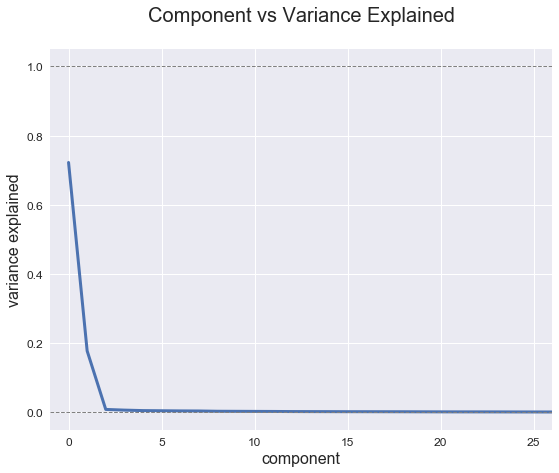

In [89]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the explained variance
component_number = range(len(var_exp))
plt.plot(component_number, var_exp, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Variance Explained\n', fontsize=20)

plt.show()

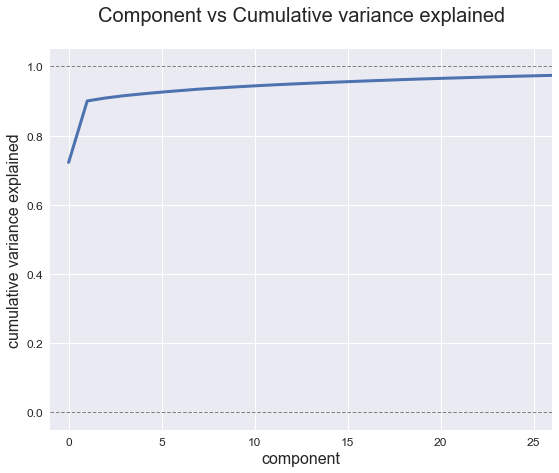

In [90]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the cumulative explained variance
component_number = range(len(cum_var_exp))
plt.plot(component_number, cum_var_exp, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Cumulative variance explained\n', fontsize=20)

plt.show()

### PCA
- without polynomial transforms

In [91]:
pca = PCA()
pca = pca.fit(X_train_sc)

In [93]:
Z_train = pd.DataFrame(pca.transform(X_train_sc))
Z_test = pd.DataFrame(pca.transform(X_test_sc))

In [94]:
Z_train.head()

0         1         2         3         4         5         6   \
0 -2.242138  1.299991 -1.107336  0.327903 -0.597256  0.299375 -0.974192   
1  2.677410  1.761009  0.100627  1.725089  0.388377 -0.088777 -0.019408   
2  1.517701  0.227959  0.838950 -1.351039 -1.081499  0.425789 -0.470862   
3  0.550394  0.747439  0.192927  1.100145 -0.715151  0.928598  0.713917   
4 -0.683680  0.729370 -0.203894 -1.268540  0.105215 -0.812825 -0.761816   

         7         8         9         10        11        12  
0  1.128789  1.526062  0.499872 -1.810828 -0.595186  0.071460  
1  0.048233  0.623827 -0.306565 -0.006430  1.117259 -0.063088  
2 -0.193134  0.005933  0.749729 -2.289926 -0.510415  0.021618  
3  0.996410 -0.704714 -0.854436  0.517319 -0.068071 -0.058616  
4  0.002593  0.576681  0.303732  0.069116 -0.394989 -0.061892

In [97]:
# Examine explained variance.
var_exp = pca.explained_variance_ratio_


# Examine cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)


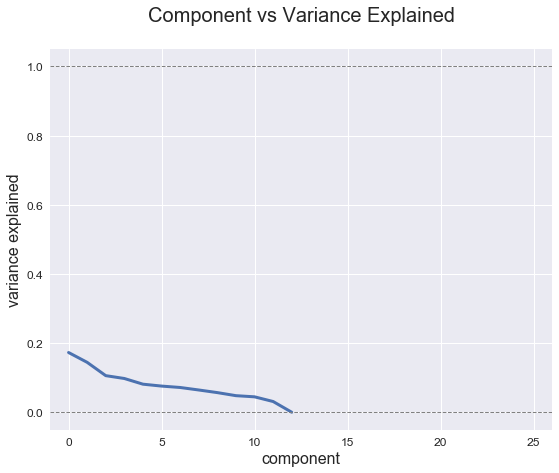

In [98]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the explained variance
component_number = range(len(var_exp))
plt.plot(component_number, var_exp, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Variance Explained\n', fontsize=20)

plt.show()

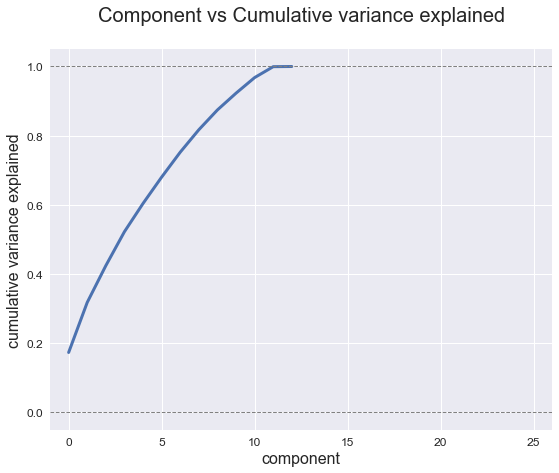

In [99]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the cumulative explained variance
component_number = range(len(cum_var_exp))
plt.plot(component_number, cum_var_exp, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Cumulative variance explained\n', fontsize=20)

plt.show()

### Logistic Regression with PCA

In [126]:
pca = PCA(n_components=9)
pca = pca.fit(X_train_sc)

In [127]:
# Generate Z_train and Z_test.
Z_train = pca.transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

# Instantiate LR model.
lr = LogisticRegression()

# Fit and score.
lr.fit(Z_train, y_train)
lr.score(Z_test, y_test)

0.5678233438485805

In [128]:
cross_val_score(lr, Z_train, y_train, cv=7).mean()

0.5208443174076598

### XGBoost Classifier with PCA

In [138]:
pca = PCA(n_components=9)
pca = pca.fit(X_train_sc)

In [139]:
# Generate Z_train and Z_test.
Z_train = pca.transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

# Instantiate LR model.
xg = XGBClassifier()

# Fit and score.
xg.fit(Z_train, y_train)
xg.score(Z_test, y_test)

0.5457413249211357

In [140]:
cross_val_score(xg, Z_train, y_train, cv=7).mean()

0.46402160283561905

### Grid Search using PCA and XGBoost

In [141]:
params = {
        'n_estimators'  : np.arange(100, 151, 25), 
        'learning_rate' : np.arange(0.1, 1, .3),
        'max_depth' : [3],
        'reg_alpha' : np.arange(0, 1, .3),
        'reg_lambda' : np.arange(0, 1, .3),
        'gamma' : np.arange(0, 1, .3),
        'subsample' : [.5],
        'n_jobs' : [4],
        }

In [142]:
def gridsearch_summary(X_train, X_test, y_train, y_test, model_name, model, model_params, problem = 'classification'):
    '''
    Arguments:
    X_train, X_test, y_train, y_test : vectorized train test split of X and y
    model_name : str name of model
    model : model constructor
        example: 'LogisticRegression' : LogisticRegression()
    model_params : dictionary of param_grids for GridSearch
        example: 'LogisticRegression' : {
                      'penalty' : ['l1', 'l2'],
                      'C' : [.1, 1, 10] }
    problem : str of problem type: 'classification' or 'regression'
    
    Return:
    summary_df : a single row DataFrame containing the GridSearch model and its 
              best model, predictions, and scores.
    '''   
    problem = problem.lower()
    
    if problem != 'regression' and problem != 'classification':
        print('Invalid problem type. Try "regression" or "classification"')
        return

    summary = {}

    # Track progress
    print(f'Fitting {model_name}')

    # GridSearch
    gs = GridSearchCVProgressBar(model, model_params, cv = 5)
    gs.fit(X_train, y_train)

    # Make predictions
    y_train_pred = gs.best_estimator_.predict(X_train)
    y_test_pred = gs.best_estimator_.predict(X_test)

    # Build summary
    summary['Model Name'] = model_name
    summary['Train Pred'] = y_train_pred
    summary['Test Pred'] = y_test_pred
    summary['Best Score'] = gs.best_score_
    summary['Best Params'] = gs.best_params_
    summary['Best Estimator'] = gs.best_estimator_
    summary['Grid Search Model'] = gs

    if problem == 'regression':
        summary['Train Score'] = r2_score(y_train, y_train_pred)
        summary['Test Score'] = r2_score(y_test, y_test_pred)
    elif problem == 'classification':
        summary['Train Score'] = accuracy_score(y_train, y_train_pred)
        summary['Test Score'] = accuracy_score(y_test, y_test_pred)
    
    # Construct output dataframe 
    summary_df = pd.DataFrame([summary])

    # Rearrange columns
    summary_df = summary_df[['Model Name', 'Best Params', 'Best Score', 'Best Estimator',
                             'Train Score', 'Test Score', 'Train Pred', 'Test Pred', 'Grid Search Model']]
        
    return summary_df

In [143]:
grid_search = gridsearch_summary(Z_train, Z_test, y_train, y_test, "XGBoostClassifier", XGBClassifier(), params,
                   problem = 'classification')




Fitting XGBoostClassifier
[........................................] 100% | 181.31 sec | GridSearchCV 


In [144]:
grid_search

Model Name                                        Best Params  \
0  XGBoostClassifier  {'gamma': 0.3, 'learning_rate': 0.700000000000...   

   Best Score                                     Best Estimator  Train Score  \
0    0.542741  XGBClassifier(base_score=0.5, booster='gbtree'...     0.993216   

   Test Score                                         Train Pred  \
0    0.498423  [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...   

                                           Test Pred  \
0  [1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...   

                                   Grid Search Model  
0  GridSearchCVProgressBar(cv=5, error_score='rai...

In [ ]:
grid_search['Best Params'][0]

### <u>Grid search using XGBoost Classifier</U>

In [167]:
#Scaling Data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [168]:
poly = PolynomialFeatures(include_bias = False)
poly = poly.fit(X_train_sc)
poly_features = poly.get_feature_names(features)

X_train_poly = pd.DataFrame(poly.transform(X_train_sc), columns=poly_features)
X_test_poly = pd.DataFrame(poly.transform(X_test_sc), columns=poly_features)


In [169]:
xg = XGBClassifier()
xg.fit(X_train_poly, y_train)
xg_cv = cross_val_score(xg, X_train_poly, y_train, cv=10).mean()
print('XGBoost Cross Validation Score {}' .format(xg_cv))

XGBoost Cross Validation Score 0.5102009132420091


In [170]:
xg.score(X_test_poly, y_test)

0.4921135646687697

In [159]:
grid_search = gridsearch_summary(X_train_poly, X_test_poly, y_train, y_test, "XGBoostClassifier", XGBClassifier(), params,
                   problem = 'classification')




Fitting XGBoostClassifier
[........................................] 100% | 1216.21 sec | GridSearchCV 


In [161]:
grid_search

Model Name                                        Best Params  \
0  XGBoostClassifier  {'gamma': 0.8999999999999999, 'learning_rate':...   

   Best Score                                     Best Estimator  Train Score  \
0     0.56445  XGBClassifier(base_score=0.5, booster='gbtree'...          1.0   

   Test Score                                         Train Pred  \
0    0.514196  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...   

                                           Test Pred  \
0  [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, ...   

                                   Grid Search Model  
0  GridSearchCVProgressBar(cv=5, error_score='rai...

In [171]:
grid_search['Best Params'][0]

{'gamma': 0.8999999999999999,
 'learning_rate': 0.7000000000000001,
 'max_depth': 3,
 'n_estimators': 100,
 'n_jobs': 4,
 'reg_alpha': 0.8999999999999999,
 'reg_lambda': 0.0,
 'subsample': 0.5}

###  <u>Generating Predictions for Confusion Matrix</u>

In [172]:
gs_model = grid_search['Grid Search Model'][0]

In [173]:
gs_model

GridSearchCVProgressBar(cv=5, error_score='raise',
            estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
            fit_params=None, iid=True, n_jobs=1,
            param_grid={'n_estimators': array([100, 125, 150]), 'learning_rate': array([0.1, 0.4, 0.7]), 'max_depth': [3], 'reg_alpha': array([0. , 0.3, 0.6, 0.9]), 'reg_lambda': array([0. , 0.3, 0.6, 0.9]), 'gamma': array([0. , 0.3, 0.6, 0.9]), 'subsample': [0.5], 'n_jobs': [4]},
            pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
            scoring=None, verbose=0)

In [174]:
gs_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.8999999999999999,
       learning_rate=0.7000000000000001, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=4,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.8999999999999999, reg_lambda=0.0, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.5)

In [176]:
gs_model.predict(X_test_poly)

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [192]:
# y_hat = gs_model.predict(X_test_poly)
y_hat =rf.predict(X_test_poly)

In [194]:
# cm = confusion_matrix(y_test, y_hat)
# cm
cm = confusion_matrix(y_test, y_hat)
cm

array([[96, 68],
       [93, 60]])

- Converting confusion matrix into a Data Frame

In [206]:
cm_df = pd.DataFrame(data=cm, columns=['predicted over', 'predicted under'],
                     index=['actual over', 'actual under'])
cm_df

predicted over  predicted under
actual over               96               68
actual under              93               60

- 96 True Positives. Predicted 96 correctly that were over the predetermined over/under
- 60 True Negatives. Predicted 60 correctlty that were under the predetermined over/under

### <u>Metrics<u>

In [207]:
cm_metrics = ClassificationMetrics()

In [208]:
cm_metrics.fit(y_test, y_hat)

In [209]:
cm_metrics.describe()

Metric
Accuracy                   0.492114
False Negative Rate        0.359788
False Positive Rate        0.414634
Misclassification          0.507886
Negative Predictive Value  0.507937
Precision                  0.468750
Sensitivity                0.392157
Specificity                0.585366